In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
import json

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

In [3]:
# Load cleaned files data 
try:
    posts_clean = pd.read_csv('posts_cleaned.csv')
    comments_clean = pd.read_csv('comments_cleaned.csv')
    print(f"Clean posts: {len(posts_clean)} rows")
    print(f"Clean comments: {len(comments_clean)} rows")
    

    posts_clean['CreatedDate'] = pd.to_datetime(posts_clean['CreatedDate'])
    comments_clean['CreatedDate'] = pd.to_datetime(comments_clean['CreatedDate'])
    
    print("\nData ready for analysis!")
    
except FileNotFoundError:
    print(" Error")

Clean posts: 50 rows
Clean comments: 1689 rows

Data ready for analysis!


In [4]:
# Basic Analysis

print("="*50)
print("ASSIGNMENT C: BASIC ANALYSIS")
print("="*50)

# Top 5 posts by Score
print("TOP 5 POSTS BY SCORE:")
top_posts = posts_clean.nlargest(5, 'Score')[['Title', 'Author', 'Score', 'NumComments']]
for i, (idx, post) in enumerate(top_posts.iterrows(), 1):
    print(f"{i}. Score: {post['Score']:,} | Comments: {post['NumComments']:,}")
    print(f"   Title: {post['Title'][:70]}{'...' if len(post['Title']) > 70 else ''}")
    print(f"   Author: u/{post['Author']}\n")

ASSIGNMENT C: BASIC ANALYSIS
TOP 5 POSTS BY SCORE:
1. Score: 2,055 | Comments: 387
   Title: [OC] How much has support for same-sex marriage changed in the US
   Author: u/_crazyboyhere_

2. Score: 2,004 | Comments: 352
   Title: [OC] Number of ICE Deportations by Year and Sitting President
   Author: u/Longlivethefarm

3. Score: 1,088 | Comments: 40
   Title: [OC] 2025 Tour de France stages: Normalized length and elevation, colo...
   Author: u/Upstairs-East6154

4. Score: 829 | Comments: 225
   Title: States where you can get a DUI riding a bike [OC]
   Author: u/Smacpats111111

5. Score: 781 | Comments: 65
   Title: New HIV/AIDS diagnoses in NYC, 1981-2019 [OC]
   Author: u/Tradition96



In [5]:
# 2. Top 5 most active users by number of comments (Assignment C requirement)
print("TOP 5 MOST ACTIVE USERS (by comment count):")
user_activity = comments_clean['Author'].value_counts().head(5)
for i, (author, count) in enumerate(user_activity.items(), 1):
    print(f"{i}. u/{author}: {count} comments")

print(f" Total unique posts: {posts_clean['PostID'].nunique():,}")
print(f" Total unique commenters: {comments_clean['Author'].nunique():,}")
print(f" Average score per post: {posts_clean['Score'].mean():.1f}")
print(f" Average comments per post: {posts_clean['NumComments'].mean():.1f}")

TOP 5 MOST ACTIVE USERS (by comment count):
1. u/truth_is_power: 20 comments
2. u/crimeo: 16 comments
3. u/Tradition96: 14 comments
4. u/superdave123123: 13 comments
5. u/TMWNN: 12 comments
 Total unique posts: 50
 Total unique commenters: 1,156
 Average score per post: 241.1
 Average comments per post: 56.0


In [14]:
#Extract 10 most common keywords

# Define stopwords for keyword extraction
stopwords = {
    'the', 'a', 'an', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 'of', 'with', 
    'by', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 
    'do', 'does', 'did', 'will', 'would', 'could', 'should', 'may', 'might', 'must',
    'this', 'that', 'these', 'those', 'i', 'you', 'he', 'she', 'it', 'we', 'they',
    'me', 'him', 'her', 'us', 'them', 'my', 'your', 'his', 'its', 'our', 'their',
    'can', 'cant', 'dont', 'doesnt', 'didnt', 'wont', 'wouldnt', 'couldnt', 'shouldnt',
    'not', 'no', 'yes', 'so', 'very', 'just', 'now', 'here', 'there', 'when', 'where',
    'what', 'who', 'why', 'how', 'get', 'got', 'go', 'going', 'goes', 'went', 'like',
    'said', 'say', 'says', 'think', 'thought', 'know', 'see', 'way', 'time', 'people'
}

def extract_keywords(text):
    """Removing stopwords"""
    if pd.isna(text):
        return []
    words = re.findall(r'\b[a-zA-Z]{3,}\b', text.lower())
    return [word for word in words if word not in stopwords]

# Extract keywords from all comments
all_keywords = []
for comment_body in comments_clean['Body']:
    keywords = extract_keywords(comment_body)
    all_keywords.extend(keywords)

# Get top 10 keywords (Assignment C requirement)
keyword_counts = Counter(all_keywords)
top_keywords = keyword_counts.most_common(10)

print(" TOP 10 MOST COMMON KEYWORDS:")
for i, (keyword, count) in enumerate(top_keywords, 1):
    percentage = (count / len(all_keywords)) * 100
    print(f"{i:2d}. '{keyword}': {count:,} occurrences ({percentage:.1f}%)")

print(f" Total unique keywords: {len(keyword_counts):,}")
print(f" Total word occurrences: {len(all_keywords):,}")

 TOP 10 MOST COMMON KEYWORDS:
 1. 'more': 270 occurrences (0.8%)
 2. 'all': 239 occurrences (0.7%)
 3. 'from': 238 occurrences (0.7%)
 4. 'https': 237 occurrences (0.7%)
 5. 'than': 204 occurrences (0.6%)
 6. 'data': 190 occurrences (0.6%)
 7. 'about': 165 occurrences (0.5%)
 8. 'one': 164 occurrences (0.5%)
 9. 'also': 147 occurrences (0.4%)
10. 'out': 147 occurrences (0.4%)
 Total unique keywords: 6,524
 Total word occurrences: 33,077


In [15]:
# Group comments by post and calculate statistics
comment_stats = comments_clean.groupby('PostID').agg({
    'CommentLength_words': ['mean', 'count']
}).round(1)
comment_stats.columns = ['Avg_Words', 'Comment_Count']

# Merge with post info
post_info = posts_clean.set_index('PostID')[['Title', 'Score']]
comment_analysis = comment_stats.join(post_info).sort_values('Comment_Count', ascending=False)

print("Top 5 posts by comment activity:")
for i, (post_id, data) in enumerate(comment_analysis.head().iterrows(), 1):
    title = data['Title'][:50] + '...' if len(data['Title']) > 50 else data['Title']
    print(f"{i}. {title}")
    print(f"   Comments: {data['Comment_Count']}, Avg length: {data['Avg_Words']} words")
    print(f"   Post score: {data['Score']}\n")

print(f"   Average words per comment: {comments_clean['CommentLength_words'].mean():.1f}")
print(f"   Median words per comment: {comments_clean['CommentLength_words'].median():.1f}")
print(f"   Longest comment: {comments_clean['CommentLength_words'].max()} words")
print(f"   Shortest comment: {comments_clean['CommentLength_words'].min()} words")

Top 5 posts by comment activity:
1. Incarceration Rates: Foreign-Born Nationals are Un...
   Comments: 100, Avg length: 42.1 words
   Post score: 448

2. States where you can get a DUI riding a bike [OC]
   Comments: 100, Avg length: 30.9 words
   Post score: 829

3. [OC] How much has support for same-sex marriage ch...
   Comments: 100, Avg length: 37.9 words
   Post score: 2055

4. [OC] Number of ICE Deportations by Year and Sittin...
   Comments: 99, Avg length: 31.9 words
   Post score: 2004

5. Number of International Tourists in the USA by Cou...
   Comments: 99, Avg length: 37.3 words
   Post score: 418

   Average words per comment: 35.3
   Median words per comment: 21.0
   Longest comment: 501 words
   Shortest comment: 1 words


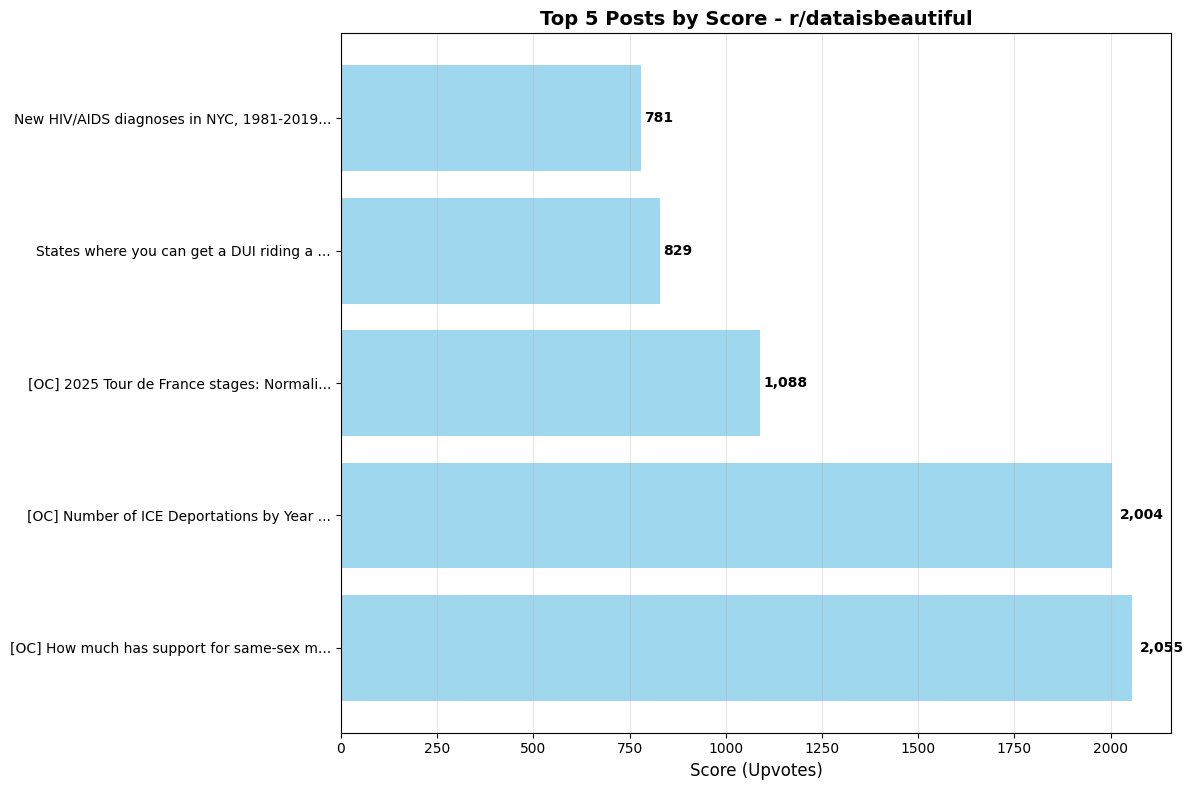

In [16]:
# Top 5 Posts by Score (Bar Chart)

# Create figure for top posts bar chart
plt.figure(figsize=(12, 8))
top_posts_viz = posts_clean.nlargest(5, 'Score')

# Create horizontal bar chart
bars = plt.barh(range(len(top_posts_viz)), top_posts_viz['Score'], color='skyblue', alpha=0.8)
plt.yticks(range(len(top_posts_viz)), 
           [title[:40] + '...' if len(title) > 40 else title for title in top_posts_viz['Title']])
plt.xlabel('Score (Upvotes)', fontsize=12)
plt.title('Top 5 Posts by Score - r/dataisbeautiful', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# Add score labels on bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + width*0.01, bar.get_y() + bar.get_height()/2, 
             f'{int(width):,}', ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

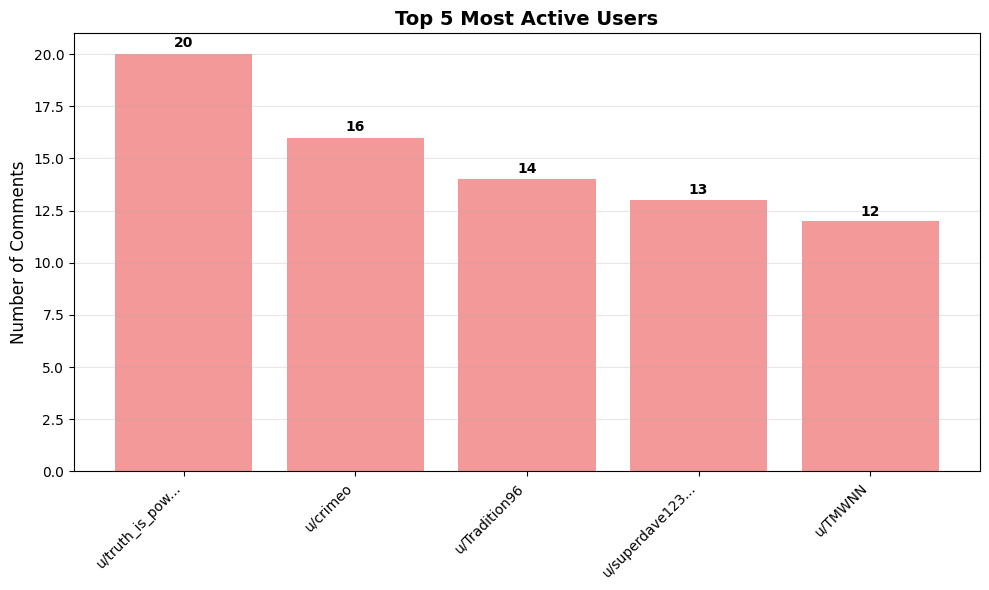

In [17]:
#Top 5 Most Active Users (Bar Chart)

# figure for top users bar chart
plt.figure(figsize=(10, 6))
top_users_viz = comments_clean['Author'].value_counts().head(5)

# vertical bar chart
bars = plt.bar(range(len(top_users_viz)), top_users_viz.values, color='lightcoral', alpha=0.8)

plt.xticks(range(len(top_users_viz)), 
           [f'u/{author[:12]}...' if len(author) > 12 else f'u/{author}' 
            for author in top_users_viz.index], rotation=45, ha='right')
plt.ylabel('Number of Comments', fontsize=12)
plt.title('Top 5 Most Active Users', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

#comment count labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

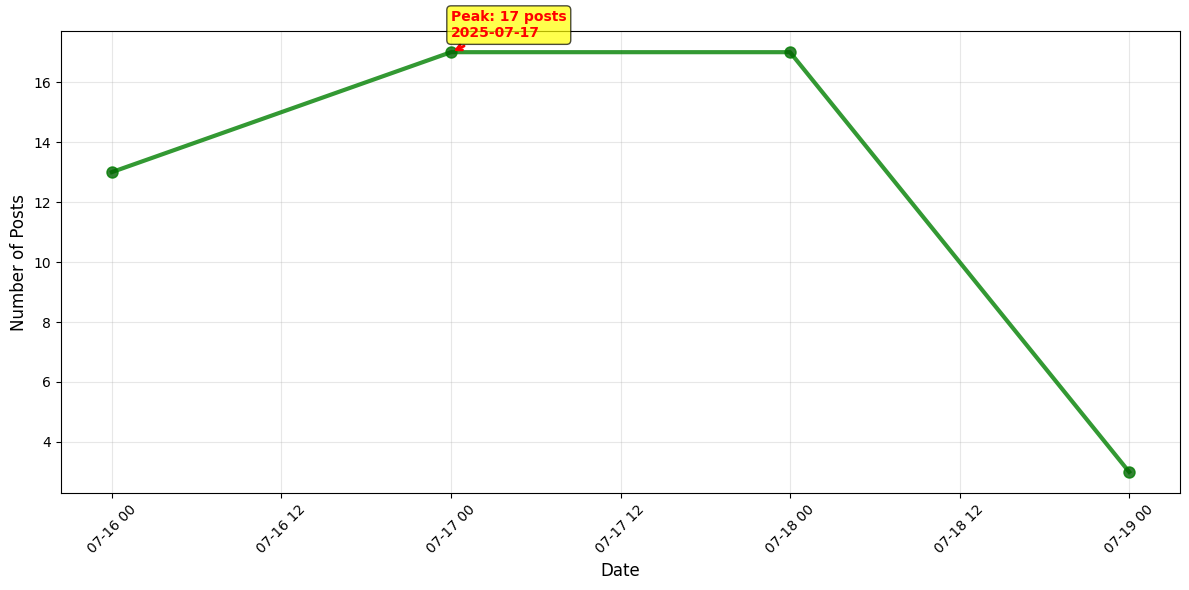

In [18]:
# posts Over Time (Line Chart)

# date data for line chart
posts_clean['Date'] = pd.to_datetime(posts_clean['Date'])
posts_by_date = posts_clean.groupby('Date').size().sort_index()

# figure for line chart
plt.figure(figsize=(12, 6))

# main 
plt.plot(posts_by_date.index, posts_by_date.values, marker='o', linewidth=3, 
         markersize=8, color='green', alpha=0.8, markerfacecolor='darkgreen')

plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Posts', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Highlight peak day 
if len(posts_by_date) > 0:
    max_day = posts_by_date.idxmax()
    max_posts = posts_by_date.max()
    plt.annotate(f'Peak: {max_posts} posts\n{max_day.strftime("%Y-%m-%d")}', 
                 xy=(max_day, max_posts), xytext=(max_day, max_posts + 0.5),
                 arrowprops=dict(arrowstyle='->', color='red', lw=2),
                 fontweight='bold', color='red', fontsize=10,
                 bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

plt.tight_layout()
plt.show()

Keyword Statistics:
   1. 'more': 270 times (13.5% of top 10)
   2. 'all': 239 times (11.9% of top 10)
   3. 'from': 238 times (11.9% of top 10)


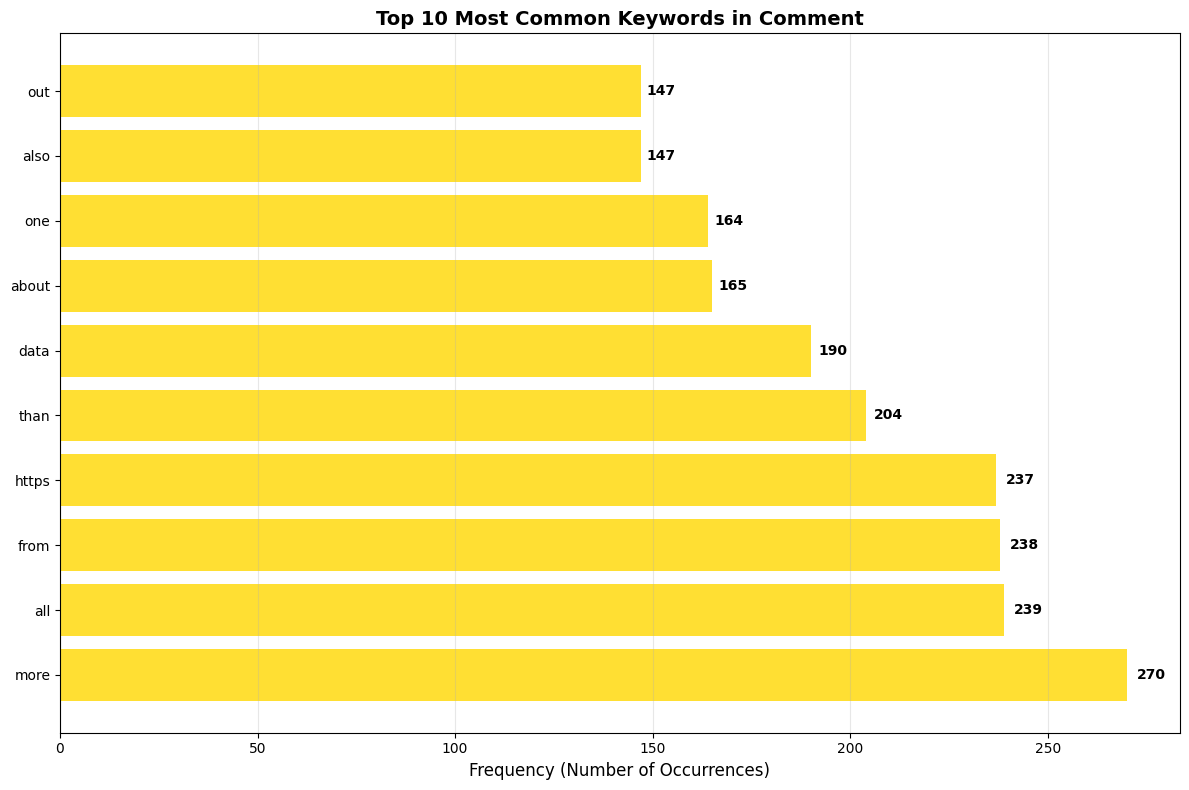

In [19]:
# top 10 Keywords (Bar Chart)


# figure for keywords chart
plt.figure(figsize=(12, 8))

# Check if keywords exist
if len(top_keywords) > 0:
    keywords, counts = zip(*top_keywords)
    
    # bar chart
    bars = plt.barh(range(len(keywords)), counts, color='gold', alpha=0.8)
    
    plt.yticks(range(len(keywords)), keywords)
    plt.xlabel('Frequency (Number of Occurrences)', fontsize=12)
    plt.title('Top 10 Most Common Keywords in Comment', 
              fontsize=14, fontweight='bold')
    plt.grid(axis='x', alpha=0.3)
    
    # add frequency labels on bars
    for i, bar in enumerate(bars):
        width = bar.get_width()
        plt.text(width + width*0.01, bar.get_y() + bar.get_height()/2, 
                 f'{int(width):,}', ha='left', va='center', fontweight='bold')
    
    # add percentage info
    total_words = sum(counts)
    print(f"Keyword Statistics:")
    for i, (keyword, count) in enumerate(top_keywords[:3], 1):
        percentage = (count / total_words) * 100
        print(f"   {i}. '{keyword}': {count:,} times ({percentage:.1f}% of top 10)")
        
else:
    plt.text(0.5, 0.5, 'No keywords found', ha='center', va='center', 
             transform=plt.gca().transAxes, fontsize=16)
    plt.title('Top 10 Keywords - No Data Available', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()